In [1]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import NullFormatter

import epicc_config as cfg

In [2]:
#GEO INFO
geo_file = xr.open_dataset(cfg.geofile_ref)
lm_is=geo_file.LANDMASK.squeeze()
lm_is=lm_is.rename({'west_east':'x','south_north':'y'})


In [3]:
#LOADING DATA
#####################################################################
#####################################################################

wrun_pre = cfg.wrf_runs[0]
wrun_fut = wrun_pre.replace("ERA5","ERA5_CMIP6anom")

fin_pre_land = xr.open_dataset(f'{cfg.path_in}/{wrun_pre}/hist2d_spell_cumsum_IFD_2013-2020_land_sum_WME.nc')
fin_fut_land = xr.open_dataset(f'{cfg.path_in}/{wrun_fut}/hist2d_spell_cumsum_IFD_2013-2020_land_sum_WME.nc')



In [11]:
X,Y=np.meshgrid(fin_pre_land.duration.values,fin_pre_land.intensity.values)

In [17]:
fin_pre_land


<xarray.Dataset>
Dimensions:    (duration: 101, intensity: 100)
Coordinates:
  * duration   (duration) int64 1 2 3 4 5 6 12 ... 540 546 552 558 564 570 576
  * intensity  (intensity) float64 2.5 7.5 12.5 17.5 ... 482.5 487.5 492.5 497.5
Data variables:
    hist2d     (duration, intensity) float64 3.474e+08 1.209e+07 ... 5.686e+04
    lat        float32 1.093e+07
    lon        float32 1.066e+06

/tmp/ipykernel_3788/2678967582.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  imp1=ax1.pcolormesh(X,Y,fin_pre_land.hist2d.values.T,cmap=plt.cm.viridis,norm=mcolors.LogNorm(vmin=1,vmax=100000))
/tmp/ipykernel_3788/2678967582.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  imf1=ax2.pcolormesh(X,Y,fin_fut_land.hist2d.values.T,cmap=plt.cm.viridis,norm=mcolors.LogNorm(vmin=1,vmax=100000))
/tmp/ipykernel_3788/2678967582.py:48: RuntimeWarning: divide by 

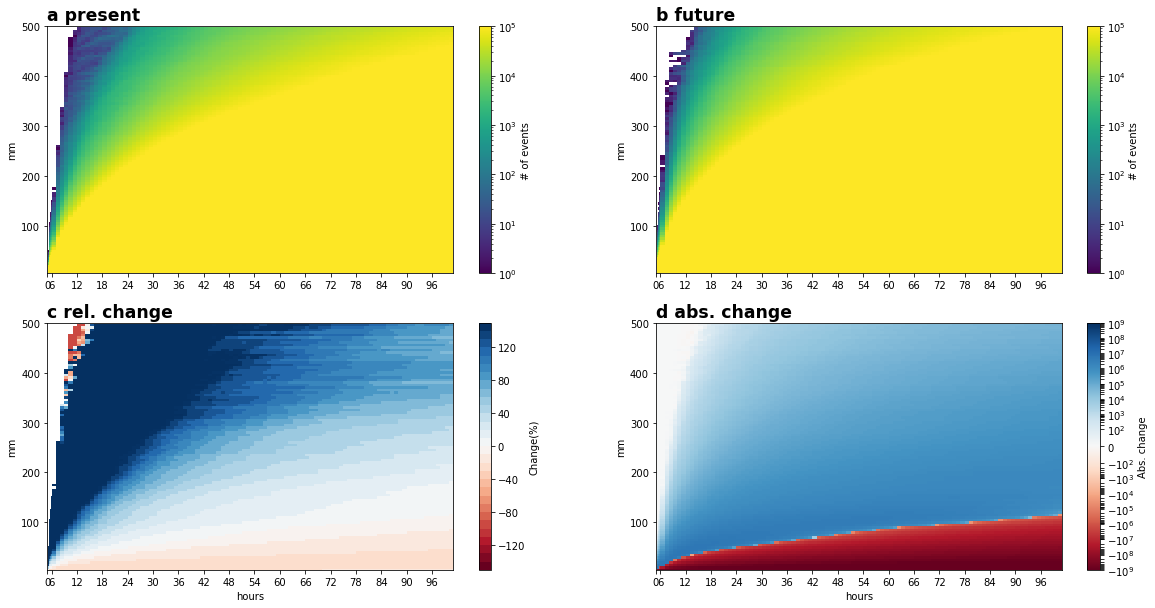

In [23]:
xticks = [0]+list(np.arange(6,582,36))
xtickslabels = list(range(0,102,6))


set_lim = False
xlim = 101
ylim = 500

fig = plt.figure(figsize=(20, 10))
ax1=fig.add_subplot(2,2,1)
ax1.set_title("a present",loc='left',fontsize='xx-large',fontweight='bold')
ax1.set_ylim(5,ylim)
if set_lim is True:
    ax1.set_xlim(0,xlim)
imp1=ax1.pcolormesh(X,Y,fin_pre_land.hist2d.values.T,cmap=plt.cm.viridis,norm=mcolors.LogNorm(vmin=1,vmax=100000))
#ax1.set_xlabel('minutes')
ax1.set_ylabel('mm')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslabels)
cb1=plt.colorbar(imp1,ax=ax1)
cb1.set_label('# of events')

ax2=fig.add_subplot(2,2,2)
ax2.set_title("b future",loc='left',fontsize='xx-large',fontweight='bold')
ax2.set_ylim(5,ylim)
if set_lim is True:
    ax2.set_xlim(0,xlim)
imf1=ax2.pcolormesh(X,Y,fin_fut_land.hist2d.values.T,cmap=plt.cm.viridis,norm=mcolors.LogNorm(vmin=1,vmax=100000))

#ax2.set_xlabel('hours')
ax2.set_ylabel('mm')
ax2.set_xticks(xticks)
ax2.set_xticklabels(xtickslabels)
cb2=plt.colorbar(imf1,ax=ax2)
cb2.set_label('# of events')

ax3= fig.add_subplot(2,2,3)
cmap = plt.get_cmap('RdBu')
ax3.set_ylim(5,ylim)
if set_lim is True:
    ax3.set_xlim(0,xlim)
#cmap = utils.rgb2cmap("/home/dargueso/share/colormaps/my_BlueWhiteOrangeRed_HESSD_reversed.rgb")
levels=np.arange(-150,160,10)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
# norm = mcolors.SymLogNorm(linthresh=10, linscale=0.5,
#                                               vmin=-200, vmax=200)
ax3.set_title("c rel. change",loc='left',fontsize='xx-large',fontweight='bold')
ctch=ax3.pcolormesh(X,Y,((np.nan_to_num(fin_fut_land.hist2d.values)-np.nan_to_num(fin_pre_land.hist2d.values))*100./np.nan_to_num(fin_pre_land.hist2d.values)).T,cmap=cmap, norm=norm)

ax3.set_xlabel('hours')
ax3.set_ylabel('mm')
ax3.set_xticks(xticks)
ax3.set_xticklabels(xtickslabels)
cb3=plt.colorbar(ctch,ax=ax3)
cb3.set_label('Change(%)')

ax4= fig.add_subplot(2,2,4)
cmap = plt.get_cmap('RdBu')
ax4.set_ylim(5,ylim)
if set_lim is True:
    ax4.set_xlim(0,xlim)
#cmap = utils.rgb2cmap("/home/dargueso/share/colormaps/my_BlueWhiteOrangeRed_HESSD_reversed.rgb")
#levels=np.arange(-2000,2100,100)
#norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
norm = mcolors.SymLogNorm(linthresh=100, linscale=1,
                                              vmin=-1000000000, vmax=1000000000)
ax4.set_title("d abs. change",loc='left',fontsize='xx-large',fontweight='bold')
ctch=ax4.pcolormesh(X,Y,(np.nan_to_num(fin_fut_land.hist2d.values)-np.nan_to_num(fin_pre_land.hist2d.values)).T,cmap=cmap, norm=norm)


ax4.set_xlabel('hours')
ax4.set_ylabel('mm')
ax4.set_xticks(xticks)
ax4.set_xticklabels(xtickslabels)
cb4=plt.colorbar(ctch,ax=ax4)
cb4.set_label('Abs. change')
plt.savefig(f'Changes_IFD_accum_EPICC{wet_th}.png',dpi=150)

In [24]:
#LOADING DATA
#####################################################################
#####################################################################

wrun_pre = cfg.wrf_runs[0]
wrun_fut = wrun_pre.replace("ERA5","ERA5_CMIP6anom")

fin_pre_land = xr.open_dataset(f'{cfg.path_in}/{wrun_pre}/hist2d_spell_sumevents_IFD_2013-2020_land_sum_WME.nc')#.isel(Ibins=slice(2,None))
fin_fut_land = xr.open_dataset(f'{cfg.path_in}/{wrun_fut}/hist2d_spell_sumevents_IFD_2013-2020_land_sum_WME.nc')#.isel(Ibins=slice(2,None))

X,Y=np.meshgrid(fin_pre_land.duration.values,fin_pre_land.intensity.values)


In [30]:

ax1.set_xticks([0]+list(np.arange(4,10.5)))
ax1.set_xticklabels([0,1,2,3,6,8,12,24])

[Text(0.0, 0, '0'),
 Text(4.0, 0, '1'),
 Text(5.0, 0, '2'),
 Text(6.0, 0, '3'),
 Text(7.0, 0, '6'),
 Text(8.0, 0, '8'),
 Text(9.0, 0, '12'),
 Text(10.0, 0, '24')]

/tmp/ipykernel_3788/2017840046.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  imp1=ax1.pcolormesh(X,Y,np.nan_to_num(fin_pre_land.hist2d.values).T,cmap=plt.cm.viridis,norm=mcolors.LogNorm(vmin=0.1,vmax=100000))
/tmp/ipykernel_3788/2017840046.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  imf1=ax2.pcolormesh(X,Y,np.nan_to_num(fin_fut_land.hist2d.values).T,cmap=plt.cm.viridis,norm=mcolors.LogNorm(vmin=0.1,vmax=100000))
/tmp/ipykernel_3788/2017840046.

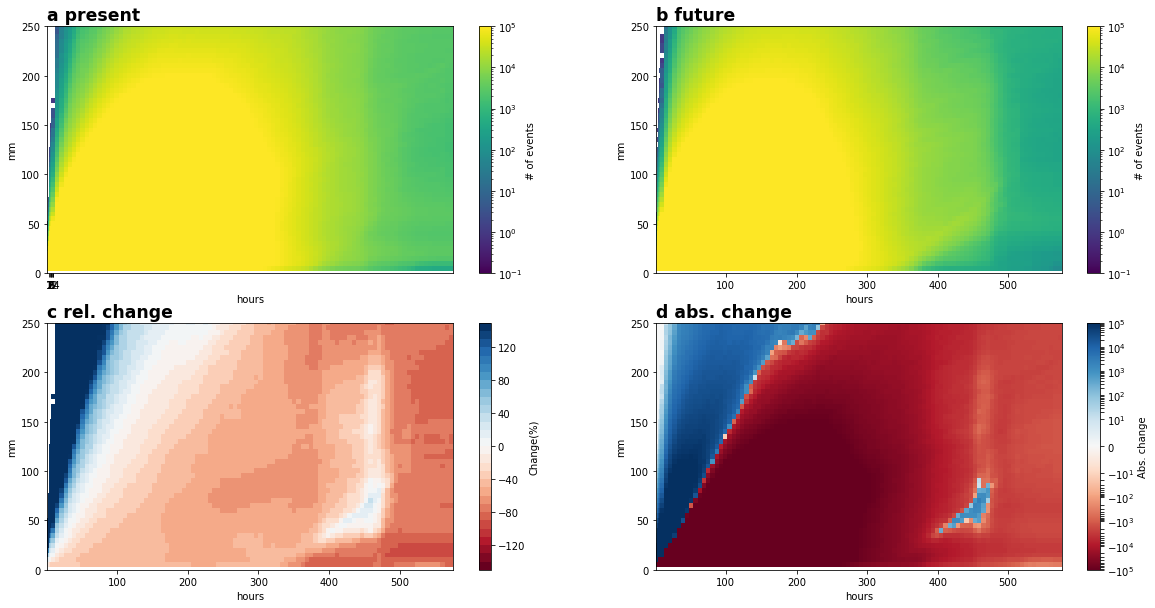

In [26]:
fig = plt.figure(figsize=(20, 10))
ax1=fig.add_subplot(2,2,1)
ax1.set_title("a present",loc='left',fontsize='xx-large',fontweight='bold')
ax1.set_ylim(0,250)
imp1=ax1.pcolormesh(X,Y,np.nan_to_num(fin_pre_land.hist2d.values).T,cmap=plt.cm.viridis,norm=mcolors.LogNorm(vmin=0.1,vmax=100000))

ax1.set_xticks(list(np.arange(3.5,10)))
ax1.set_xticklabels([1,2,3,6,8,12,24])

ax1.set_xlabel('hours')
ax1.set_ylabel('mm')
cb1=plt.colorbar(imp1,ax=ax1)
cb1.set_label('# of events')

ax2=fig.add_subplot(2,2,2)
ax2.set_title("b future",loc='left',fontsize='xx-large',fontweight='bold')
ax2.set_ylim(0,250)

imf1=ax2.pcolormesh(X,Y,np.nan_to_num(fin_fut_land.hist2d.values).T,cmap=plt.cm.viridis,norm=mcolors.LogNorm(vmin=0.1,vmax=100000))
ax2.set_xlabel('hours')
ax2.set_ylabel('mm')
cb2=plt.colorbar(imf1,ax=ax2)
cb2.set_label('# of events')

ax3= fig.add_subplot(2,2,3)
cmap = plt.get_cmap('RdBu')
ax3.set_ylim(0,250)

#cmap = utils.rgb2cmap("/home/dargueso/share/colormaps/my_BlueWhiteOrangeRed_HESSD_reversed.rgb")
levels=np.arange(-150,160,10)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
# norm = mcolors.SymLogNorm(linthresh=10, linscale=0.5,
#                                               vmin=-200, vmax=200)
ax3.set_title("c rel. change",loc='left',fontsize='xx-large',fontweight='bold')
ctch=ax3.pcolormesh(X,Y,((np.nan_to_num(fin_fut_land.hist2d.values)-np.nan_to_num(fin_pre_land.hist2d.values))*100./np.nan_to_num(fin_pre_land.hist2d.values)).T,cmap=cmap, norm=norm)
ax3.set_xlabel('hours')
ax3.set_ylabel('mm')
cb3=plt.colorbar(ctch,ax=ax3)
cb3.set_label('Change(%)')

ax4= fig.add_subplot(2,2,4)
cmap = plt.get_cmap('RdBu')
ax4.set_ylim(0,250)

#cmap = utils.rgb2cmap("/home/dargueso/share/colormaps/my_BlueWhiteOrangeRed_HESSD_reversed.rgb")
#levels=np.arange(-2000,2100,100)
#norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
norm = mcolors.SymLogNorm(linthresh=10, linscale=1,
                                              vmin=-100000, vmax=100000)
ax4.set_title("d abs. change",loc='left',fontsize='xx-large',fontweight='bold')
ctch=ax4.pcolormesh(X,Y,(np.nan_to_num(fin_fut_land.hist2d.values)-np.nan_to_num(fin_pre_land.hist2d.values)).T,cmap=cmap, norm=norm)
ax4.set_xlabel('hours')
ax4.set_ylabel('mm')
cb4=plt.colorbar(ctch,ax=ax4)
cb4.set_label('Abs. change')
#plt.savefig(f'Changes_IFD_accum_{island}.png')

/tmp/ipykernel_3788/167541952.py:13: RuntimeWarning: divide by zero encountered in true_divide
  ctch=ax3.pcolormesh(X,Y,((np.nan_to_num(fin_fut_land.hist2d.values)-np.nan_to_num(fin_pre_land.hist2d.values))*100./np.nan_to_num(fin_pre_land.hist2d.values)).T,cmap=cmap, norm=norm)
/tmp/ipykernel_3788/167541952.py:13: RuntimeWarning: invalid value encountered in true_divide
  ctch=ax3.pcolormesh(X,Y,((np.nan_to_num(fin_fut_land.hist2d.values)-np.nan_to_num(fin_pre_land.hist2d.values))*100./np.nan_to_num(fin_pre_land.hist2d.values)).T,cmap=cmap, norm=norm)
/tmp/ipykernel_3788/167541952.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ctch=ax3.pcolormesh(X,Y,((np.nan_to_num(fin_fut_land.hist2d.values)-np.nan_to_num(fin_pre

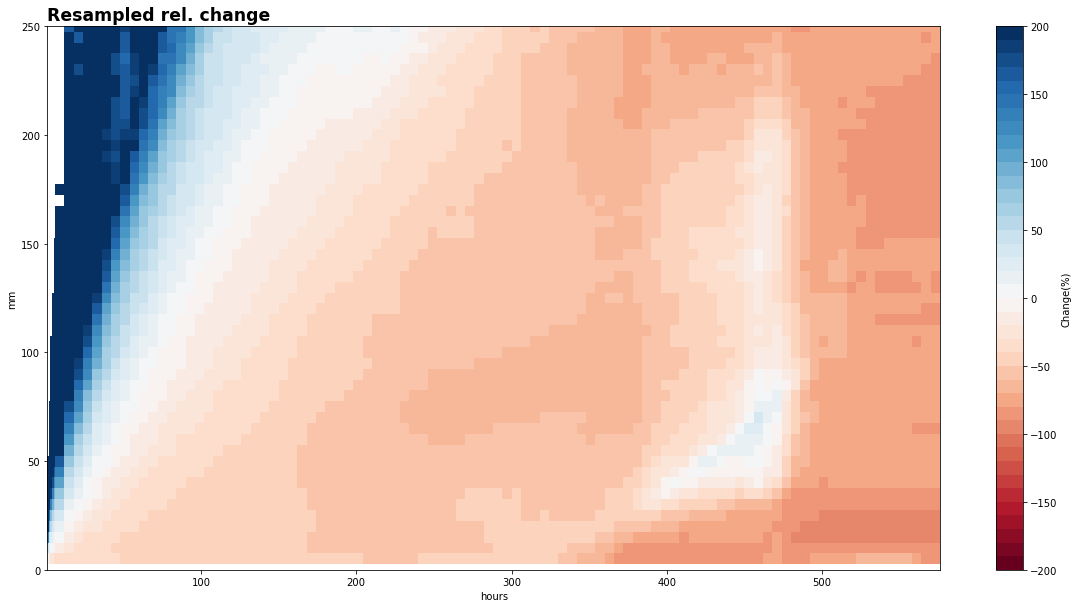

In [29]:
fig = plt.figure(figsize=(20, 10))
ax3= fig.add_subplot(1,1,1)
cmap = plt.get_cmap('RdBu')
ax3.set_ylim(0,250)
#ax3.set_xticks(list(np.arange(3.5,10)))
#ax3.set_xticklabels([1,2,3,6,8,12,24])
#cmap = utils.rgb2cmap("/home/dargueso/share/colormaps/my_BlueWhiteOrangeRed_HESSD_reversed.rgb")
levels=np.arange(-200,210,10)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
# norm = mcolors.SymLogNorm(linthresh=10, linscale=0.5,
#                                               vmin=-200, vmax=200)
ax3.set_title("Resampled rel. change",loc='left',fontsize='xx-large',fontweight='bold')
ctch=ax3.pcolormesh(X,Y,((np.nan_to_num(fin_fut_land.hist2d.values)-np.nan_to_num(fin_pre_land.hist2d.values))*100./np.nan_to_num(fin_pre_land.hist2d.values)).T,cmap=cmap, norm=norm)
ax3.set_xlabel('hours')
ax3.set_ylabel('mm')
cb3=plt.colorbar(ctch,ax=ax3)
cb3.set_label('Change(%)')

plt.savefig(f'Changes_IFD_resampled.png',dpi=150)